In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('amazon_file.csv')

In [3]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
namechange={"product_id":"Product ID", "product_name":"Product Name", "category":"Category", "discounted_price":"Discounted Price", "actual_price":"Actual Price", "discount_percentage":"Discount Percentage", "rating":"Rating", "rating_count":"Rating Count", "about_product":"About Product", "user_id":"User ID", "user_name":"User Name", "review_id":"Review ID", "review_title":"Review Title", "review_content":"Review Content", "img_link":"IMG Link", "product_link":"Product Link"}
df = df.rename(columns=namechange)

In [5]:
df.drop('Product Link',axis=1,inplace=True)
df.drop('IMG Link',axis=1,inplace=True)
df.drop('Review Content',axis=1,inplace=True)
df.drop('Review Title',axis=1,inplace=True)
df.drop('Review ID',axis=1,inplace=True)

In [6]:
df['Discounted Price'] = df['Discounted Price'].str.replace("₹",'').str.replace(",",'')
df['Actual Price'] = df['Actual Price'].str.replace("₹",'').str.replace(",",'')
df['Discount Percentage'] = df['Discount Percentage'].str.replace("%",'')
df['Rating Count'] = df['Rating Count'].str.replace(",",'')

In [7]:
df['Discounted Price'] = pd.to_numeric(df['Discounted Price'], errors='coerce')
df['Actual Price'] = pd.to_numeric(df['Actual Price'], errors='coerce')


In [8]:
df.head(5)

,Product ID,Product Name,Category,Discounted Price,Actual Price,Discount Percentage,Rating,Rating Count,About Product,User ID,User Name
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK..."


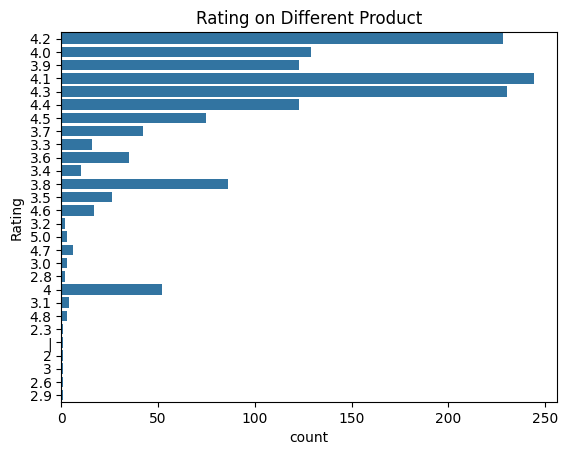

In [9]:
df_g = sns.countplot(df['Rating'])
df_g.set_title("Rating on Different Product")
plt.show()

In [10]:
top_selling_products = df.sort_values(by='Rating Count', ascending=False).head(10)

In [11]:
top_selling_products = top_selling_products[['Product Name', 'Rating', 'Rating Count']]
top_selling_products.reset_index(drop=True, inplace=True)
top_selling_products
# top selling products

,Product Name,Rating,Rating Count
0,IT2M Designer Mouse Pad for Laptop/Computer (9...,4.3,9998
1,AirCase Protective Laptop Bag Sleeve fits Upto...,4.4,9940
2,Eureka Forbes car Vac 100 Watts Powerful Sucti...,|,992
3,Eveready Red 1012 AAA Batteries - Pack of 10,4.3,989
4,Sennheiser CX 80S in-Ear Wired Headphones with...,4.1,98250
5,Wecool Nylon Braided Multifunction Fast Chargi...,3.3,9792
6,Wecool Nylon Braided Multifunction Fast Chargi...,3.3,9792
7,Pigeon By Stovekraft ABS Plastic Acer Plus Ind...,3.8,9791
8,Bajaj DHX-9 1000W Heavy Weight Dry Iron with A...,4.2,9772
9,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,3.7,976


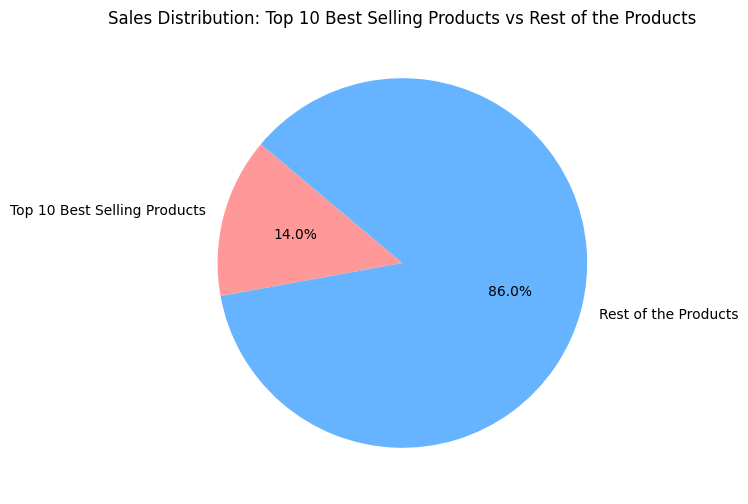

In [17]:
df['Rating Count'] = pd.to_numeric(df['Rating Count'], errors='coerce')
top_selling_products = df.dropna(subset=['Rating Count']).nlargest(10, 'Rating Count')
top_10_total_ratings = top_selling_products['Rating Count'].sum()
total_ratings_all_products = df['Rating Count'].sum()
ratings_rest_of_products = total_ratings_all_products - top_10_total_ratings
pie_data = [top_10_total_ratings, ratings_rest_of_products]
labels = ['Top 10 Best Selling Products', 'Rest of the Products']
plt.figure(figsize=(10, 6))
plt.pie(pie_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Sales Distribution: Top 10 Best Selling Products vs Rest of the Products')
plt.show()

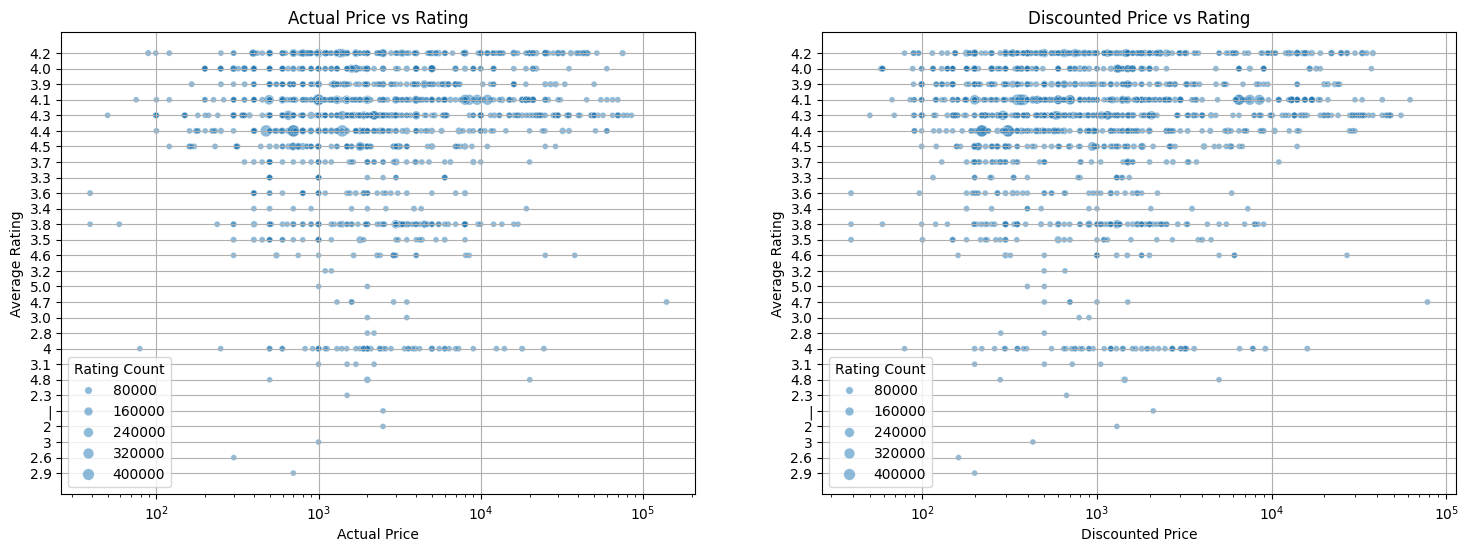

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

#Scatter plot for actual price vs rating
sns.scatterplot(ax=axes[0], data=df, x='Actual Price', y='Rating', size='Rating Count', alpha=0.5)
axes[0].set_title('Actual Price vs Rating')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Average Rating')
axes[0].set_xscale('log')
axes[0].grid(True)

#Scatter plot for discounted price vs rating
sns.scatterplot(ax=axes[1], data=df, x='Discounted Price', y='Rating', size='Rating Count', alpha=0.5)
axes[1].set_title('Discounted Price vs Rating')
axes[1].set_xlabel('Discounted Price')
axes[1].set_ylabel('Average Rating')
axes[1].set_xscale('log')  
axes[1].grid(True)

plt.show()


In [21]:
from collections import Counter
categories = df['Category'].str.split('|').explode()
category_counts = Counter(categories)
category_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

#Display the top categories
top_categories = category_df.head(10)
top_categories.reset_index(drop=True, inplace=True)
top_categories

,Category,Count
0,Electronics,526
1,Computers&Accessories,453
2,Home&Kitchen,448
3,Accessories&Peripherals,381
4,Kitchen&HomeAppliances,308
5,Cables,267
6,Cables&Accessories,240
7,USBCables,233
8,SmallKitchenAppliances,181
9,"HomeTheater,TV&Video",162


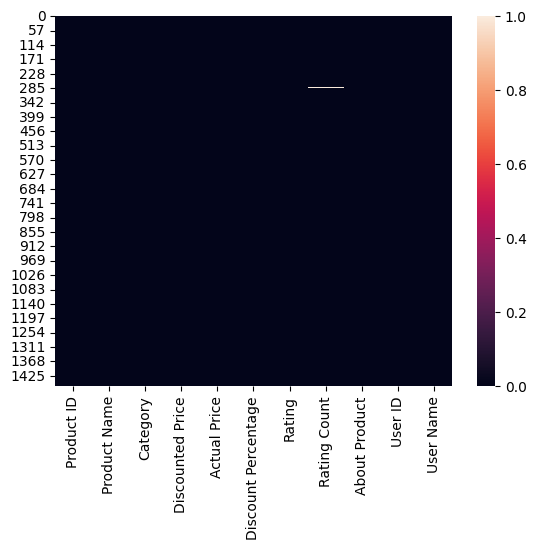

In [25]:
sns.heatmap(df.isnull())
plt.show()

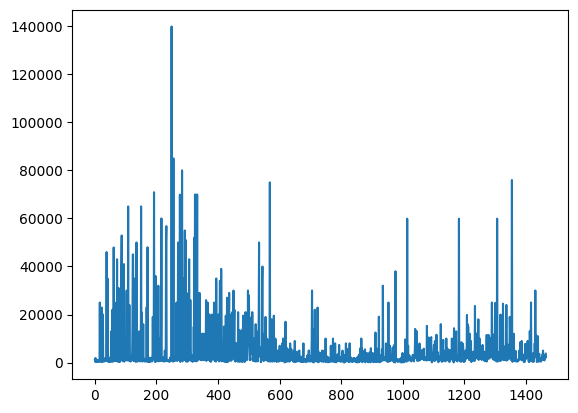

In [29]:
plt.plot(df['Actual Price'])